## Comcast Telecom Consumer Complaints

### DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

### Data Dictionary
* Ticket #: Ticket number assigned to each complaint
* Customer Complaint: Description of complaint
* Date: Date of complaint
* Time: Time of complaint
* Received Via: Mode of communication of the complaint
* City: Customer city
* State: Customer state
* Zipcode: Customer zip
* Status: Status of complaint
* Filing on behalf of someone




### Step 1: Identify Problem Statement:

### Analysis Task


- To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.
    -  Import data into Python environment.
    - Provide the trend chart for the number of complaints at monthly and daily granularity levels.
    - Provide a table with the frequency of complaint types.
- Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
    - Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
    - Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:
- Which state has the maximum complaints
    - Which state has the highest percentage of unresolved complaints
    - Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable.

### step 2: Data Acquisition:

#### Task 1: Import data into Python environment

In [2]:
#Importing required Libraries
import numpy as np
import pandas as pd

In [3]:
#Comcast Telecom Consumer Complaints as df_ctcc
df_ctcc = pd.read_csv("Comcast_telecom_complaints_data.csv")
#View random features from the loaded data
df_ctcc.sample(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
1135,327786,bait & switch,06-08-15,06-Aug-15,6:18:48 AM,Internet,Lilburn,Georgia,30047,Closed,No
1950,364963,Extremely Poor Customer Service,25-06-15,25-Jun-15,1:10:31 PM,Internet,Spring,Texas,77373,Solved,Yes
373,360047,Internet speeds are throttled,23-06-15,23-Jun-15,8:16:37 PM,Customer Care Call,Charleston,South Carolina,29403,Solved,No
2060,263031,"Internet ""Overage"" Charges",28-04-15,28-Apr-15,9:52:27 PM,Customer Care Call,Tucson,Arizona,85737,Closed,No
1681,276668,INTERNET SERVICE IS DOWN FOR THREE WEEKS NOW.,05-06-15,05-Jun-15,4:28:55 PM,Customer Care Call,Richton Park,Illinois,60471,Closed,No


In [4]:
##View the data(observations),shape,info,describe to get more insights on the data.
print ("Shape of the data:", df_ctcc.shape)
print ("----------------------------\n")
print ("Info. of the data:", df_ctcc.info())
print ("\n----------------------------\n")
print ("Describe of the data:", df_ctcc.describe())

Shape of the data: (2224, 11)
----------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB
Info. of the data: None

--------------

### Step 3: Data Wrangling

In [5]:
# Check the features
df_ctcc.columns

Index(['Ticket #', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone'],
      dtype='object')

In [6]:
#Check for null values
df_ctcc.isnull().sum()

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

#### Task 2: Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [7]:
#Check the datatypes and do necessary conversions
df_ctcc.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [8]:
#Converting Data object to datetime format
df_ctcc['Date_month_year'] = pd.to_datetime(df_ctcc['Date_month_year'])
df_ctcc.dtypes

Ticket #                               object
Customer Complaint                     object
Date                                   object
Date_month_year                datetime64[ns]
Time                                   object
Received Via                           object
City                                   object
State                                  object
Zip code                                int64
Status                                 object
Filing on Behalf of Someone            object
dtype: object

In [9]:
df_ctcc['Created_Month'] =  df_ctcc['Date_month_year'].apply(lambda x: x.month)
df_ctcc['Created_Day'] = df_ctcc['Date_month_year'].apply(lambda x: x.day)
df_ctcc['Created_Day of Week'] = df_ctcc['Date_month_year'].apply(lambda x: x.dayofweek)
import calendar
df_ctcc['Created_Month'] = df_ctcc['Created_Month'].apply(lambda x: calendar.month_abbr[x])
df_ctcc['Created_Day of Week']=df_ctcc['Created_Day of Week'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thur',4:'Fri',5:'Sat',6:'Sun'})
df_ctcc.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Created_Month,Created_Day,Created_Day of Week
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr,22,Wed
1,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug,4,Tue
2,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr,18,Sat
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Jul,5,Sun
4,307175,Comcast not working and no service to boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,26,Tue


In [10]:
#Importing libraries for graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [11]:
# Provide the trend chart for the number of complaints at monthly granularity levels.

bymonth = df_ctcc.groupby('Created_Month')["Ticket #"].count()
print("Max num of complaints raised in the month of :",bymonth.idxmax()," with the count of -",bymonth.max())
bymonth = bymonth.reset_index()


Max num of complaints raised in the month of : Jun  with the count of - 1046


Text(0.8, 0.85, 'Max complaints in Jun with 1046')

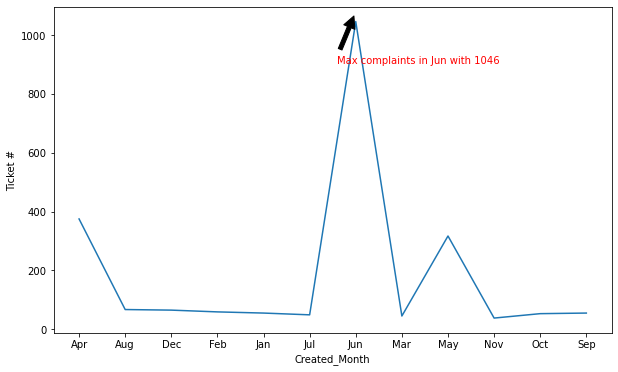

In [12]:
plt.figure(figsize=(10,6))
lp = sns.lineplot(x='Created_Month', y= 'Ticket #', data = bymonth)
ax = lp.axes
ax.annotate('Max complaints in Jun with 1046', color='red',
            xy=(6, 1080), xycoords='data',
            xytext=(0.8, 0.85), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.1),
            horizontalalignment='right', verticalalignment='top')

In [13]:
# Provide the trend chart for the number of complaints at daily granularity levels.
df_ctcc['Day of Month'] = pd.to_datetime(df_ctcc['Date'])
comcast_tele_consumer_daily = df_ctcc.set_index(df_ctcc["Day of Month"])
comcast_tele_consumer_daily.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Created_Month,Created_Day,Created_Day of Week,Day of Month
Day of Month,,,,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr,22,Wed,2015-04-22
2015-04-08,223441,Payment disappear - service got disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug,4,Tue,2015-04-08
2015-04-18,242732,Speed and Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr,18,Sat,2015-04-18


<AxesSubplot:xlabel='Day of Month', ylabel='Number of Complaints'>

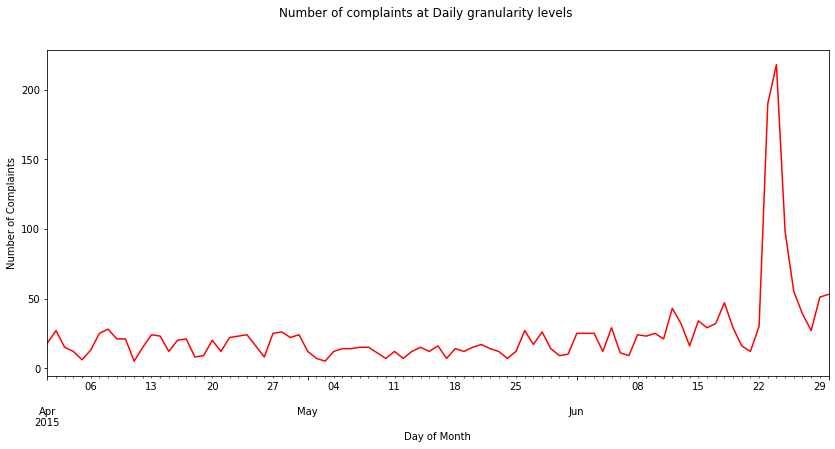

In [14]:
#Increase Graph Size
plt.figure(figsize=(14,6))
plt.suptitle('Number of complaints at Daily granularity levels')
plt.ylabel('Number of Complaints')
comcast_tele_consumer_daily.groupby(pd.Grouper(freq="D")).size().plot(color='red')

<AxesSubplot:xlabel='Created_Day of Week', ylabel='count'>

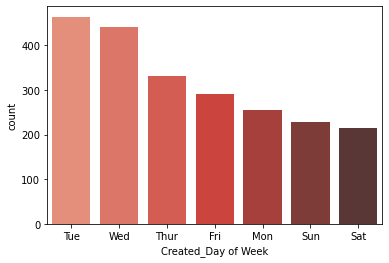

In [15]:
#number of complaints based on created day of the week
sns.countplot(x='Created_Day of Week', data = df_ctcc, order=df_ctcc['Created_Day of Week'].value_counts().index, palette ="Reds_d")
#More number of complaints on Tuesday and wednesday

#### Task 3: Provide a table with the frequency of complaint types.

In [16]:
#str.title()--> Converts first character of each word to uppercase and remaining to lowercase.
df_ctcc['Customer Complaint'] = df_ctcc['Customer Complaint'].str.title()
CT_freq = df_ctcc['Customer Complaint'].value_counts()
CT_freq

Comcast                                                            102
Comcast Data Cap                                                    30
Comcast Internet                                                    29
Comcast Data Caps                                                   21
Comcast Billing                                                     18
                                                                  ... 
Monthly Data Caps                                                    1
Comcast/Xfinity Poor Service, Fraudulent Billing And Collection      1
Lost Emails/Billing                                                  1
Improper Billing And Non Resolution Of Issues                        1
Comcast, Ypsilanti Mi Internet Speed                                 1
Name: Customer Complaint, Length: 1740, dtype: int64

#### Task 4: Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [17]:
df_ctcc.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Created_Month,Created_Day,Created_Day of Week,Day of Month
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr,22,Wed,2015-04-22
1,223441,Payment Disappear - Service Got Disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug,4,Tue,2015-04-08
2,242732,Speed And Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr,18,Sat,2015-04-18


In [18]:
df_ctcc.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [19]:
df_ctcc["New_Status"] = ["Open" if Status=="Open" or Status=="Pending" else "Closed"
                        for Status in df_ctcc["Status"]]

In [20]:
df_ctcc["New_Status"].unique()

array(['Closed', 'Open'], dtype=object)

In [21]:
#Checking the ticket status by state
df_ctcc_state_status = pd.crosstab(df_ctcc["State"],df_ctcc["New_Status"])

In [22]:
df_ctcc_state_status

New_Status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


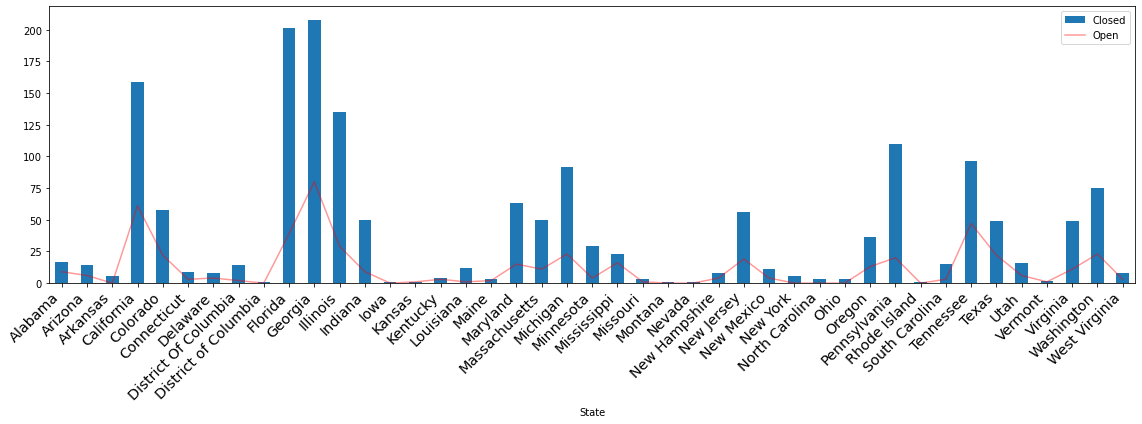

In [23]:
#Method 1:
plt.figure(figsize=(16,6))
closed=df_ctcc_state_status["Closed"]
opened=df_ctcc_state_status["Open"]
opened.plot(ax=closed.plot(kind="bar",legend=True),color="r",alpha=0.4,legend="True")
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)
plt.tight_layout()

<AxesSubplot:title={'center':'State wise status of complaints'}, xlabel='State'>

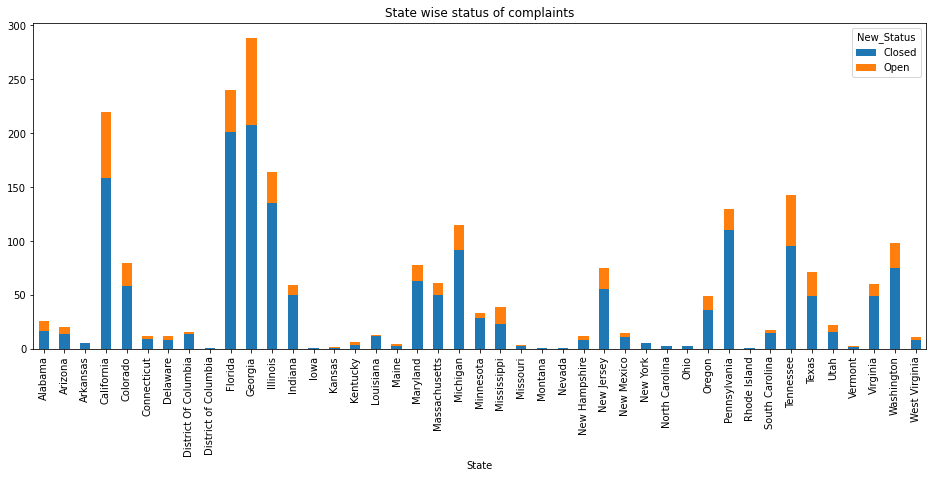

In [24]:
#Method 2
pd.crosstab(df_ctcc["State"],df_ctcc["New_Status"]).plot(kind='bar',figsize=(16,6),
                                                      stacked=True,
                                                      title='State wise status of complaints')

In [25]:
#  Georgia has maximum number of complaints

#### Task 5: Which state has the highest percentage of unresolved complaints

In [26]:
df_ctcc_unresolved_complaints = df_ctcc_state_status["Open"].sort_values()

In [27]:
print("State with max unresolved complaints: ",df_ctcc_unresolved_complaints.idxmax(),df_ctcc_unresolved_complaints.max())

State with max unresolved complaints:  Georgia 80


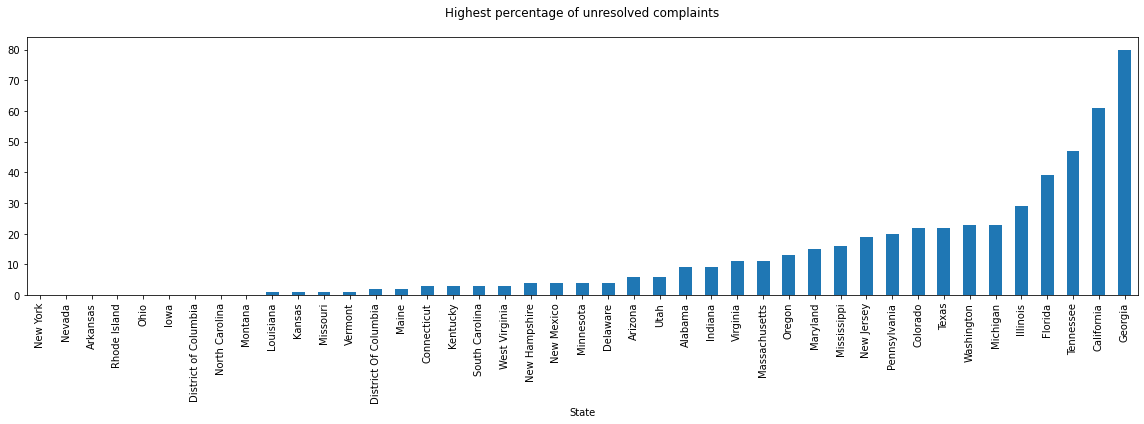

In [28]:
df_ctcc_unresolved_complaints.plot(kind="bar", figsize=(16,6))
plt.title('Highest percentage of unresolved complaints\n')
plt.tight_layout()


#### Task 6: Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [29]:
df_ctcc.head(5)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,Created_Month,Created_Day,Created_Day of Week,Day of Month,New_Status
0,250635,Comcast Cable Internet Speeds,22-04-15,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,Apr,22,Wed,2015-04-22,Closed
1,223441,Payment Disappear - Service Got Disconnected,04-08-15,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,Aug,4,Tue,2015-04-08,Closed
2,242732,Speed And Service,18-04-15,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,Apr,18,Sat,2015-04-18,Closed
3,277946,Comcast Imposed A New Usage Cap Of 300Gb That ...,05-07-15,2015-07-05,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,Jul,5,Sun,2015-05-07,Open
4,307175,Comcast Not Working And No Service To Boot,26-05-15,2015-05-26,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,May,26,Tue,2015-05-26,Closed


In [30]:
df_ctcc["Received Via"].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [31]:
df_ctcc.New_Status.value_counts()

Closed    1707
Open       517
Name: New_Status, dtype: int64

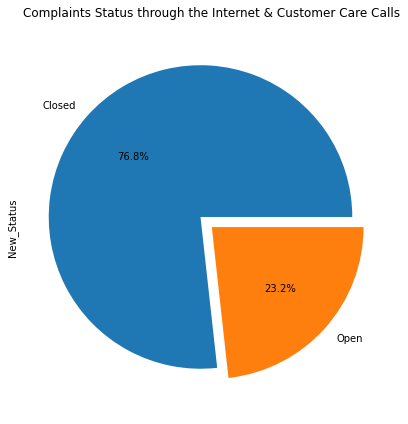

In [32]:
# Used autopct='%1.1f%%'  to show percentage under the pie chart
myexplode = [0.1,0]
plt.title('Complaints Status through the Internet & Customer Care Calls\n')
df_ctcc.New_Status.value_counts().plot(kind='pie',explode = myexplode,autopct='%1.1f%%',
                        figsize = (14,6))
plt.tight_layout()

## Additional task: Find the frequent words for customer complaints

In [33]:
#Importing NLTK and required libraries,modules
import nltk

In [290]:
from wordcloud import WordCloud, STOPWORDS

ModuleNotFoundError: No module named 'wordcloud'

In [3]:
#installing wordcloud module
%pip install wordcloud

  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp39-cp39-win_amd64.whl size=162677 sha256=6400e06958ebdb3f81cc0bc6fef6b24e0f21cb6cb0f8a6e0906363f38e836b82
  Stored in directory: c:\users\grkum\appdata\local\pip\cache\wheels\f9\7a\dd\06ef8b5dfe5483f6204133c08eeb16c287cc2c05e290ae2fc0
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [38]:
from wordcloud import WordCloud, STOPWORDS
common_complaints = df_ctcc['Customer Complaint'].dropna().tolist()
common_complaints =''.join(common_complaints).lower()

#Provided list of stop words
list_stops = ('Comcast','Now','Company','Day','Someone','Thing','Also','Got','Way','Call','Called','One','Said','Tell')

for word in list_stops:
    STOPWORDS.add(word)


In [39]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1200,
                      height=1000).generate(common_complaints)

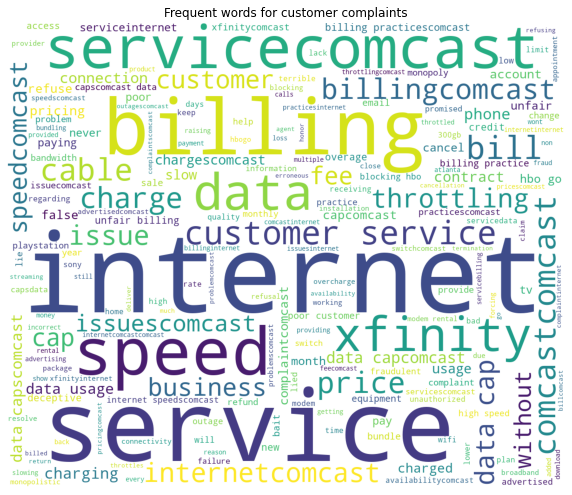

In [40]:
plt.figure( figsize=(10,12) )
plt.imshow(wordcloud)
plt.title('Frequent words for customer complaints')
plt.axis('off')
plt.show()